# Giving a live example of lightkurve.periodogram()

In [1]:
import lightkurve
from lightkurve import KeplerLightCurveFile
from tqdm import tqdm

target = "KIC11615890"
lc = lightkurve.search_lightcurvefile(target, quarter=0).download().PDCSAP_FLUX.normalize()
for q in tqdm(range(1, 17)):
    try:
        lc = lc.append(lightkurve.search_lightcurvefile(target, quarter=q).download().PDCSAP_FLUX.normalize())
    except:
        pass
lc = lc.remove_nans()

100%|██████████| 16/16 [00:34<00:00,  2.13s/it]


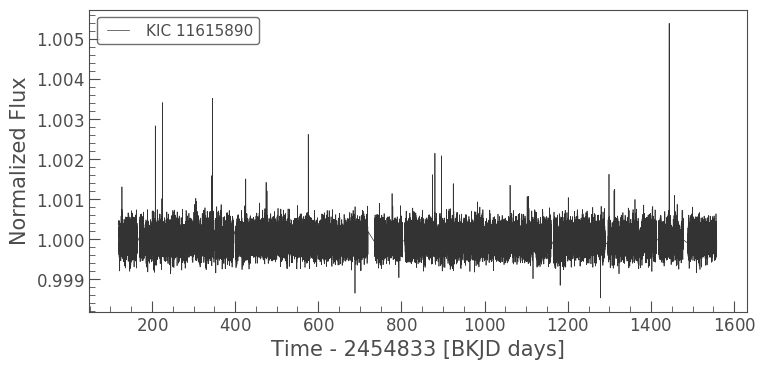

In [2]:
lc.plot()

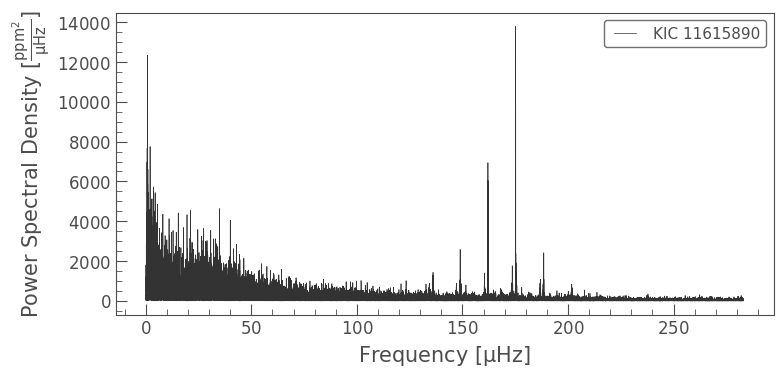

In [4]:
from astropy import units as u
pg = lc.to_periodogram(freq_unit= u.microhertz)
pg.plot()

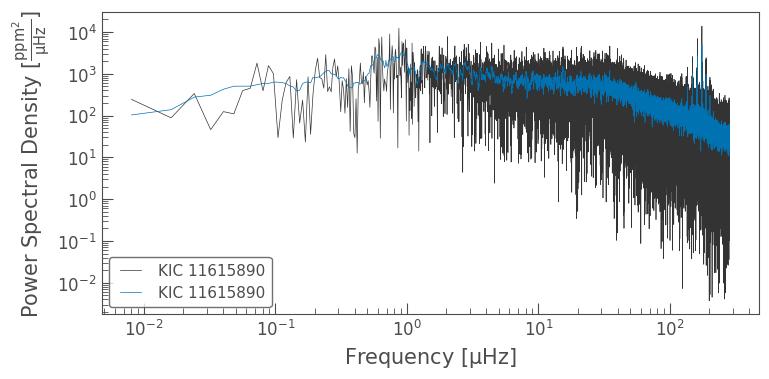

In [6]:
ax = pg.plot(scale='log')
pg.smooth().plot(ax=ax, scale='log')

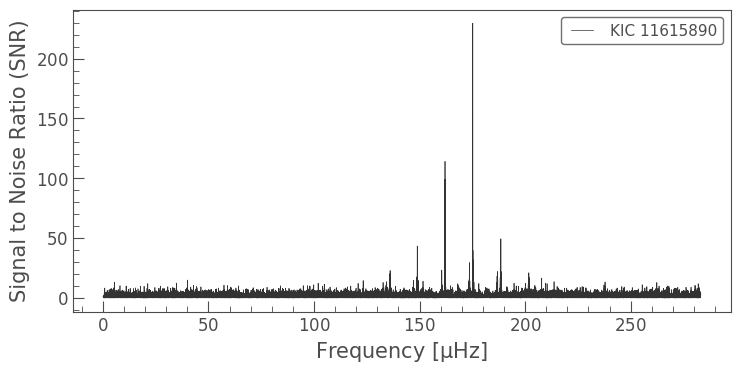

In [7]:
snr = pg.flatten()
snr.plot()

In [9]:
snr.show_properties()

lightkurve.Periodogram properties:
      Attribute         Description    Units 
---------------------- -------------- -------
              targetid       11615890        
                 label   KIC 11615890        
frequency_at_max_power       175.2029     uHz
             max_power       229.5935        
               nyquist       283.2116     uHz
   period_at_max_power         0.0057 1 / uHz
             frequency array (35172,)     uHz
                period array (35172,) 1 / uHz
                 power array (35172,)        
                  meta <class 'dict'>        
